In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

df=pd.read_csv("goldprice.csv")
print(df.columns)
df.head()

df.drop_duplicates(['Date'],inplace=True)
df.dropna(inplace=True)
df.head()




Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')


,Date,Price,Open,High,Low,Vol.,Change %
0,06-01-2025,"77,158","77,317","77,520","76,563",8.02,-0.21%
1,03-01-2025,"77,317","77,946","77,947","77,260",4.43,-0.51%
3,01-01-2025,"76,893","76,772","76,930","76,660",0.91,0.19%
4,31-12-2024,"76,748","76,353","76,830","76,216",5.14,0.64%
5,30-12-2024,"76,260","76,714","76,775","76,018",6.18,-0.37%


In [ ]:

import re
for col in ['Price','Open','High','Low']:
  df[col]=df[col].astype(str).str.replace(',','').astype(float)
df['Change %']=df['Change %'].astype(str).str.replace('%','')
df['Change %']=df['Change %'].astype(float)
df.head()
df["Date"]=pd.to_datetime(df["Date"],format="%d-%m-%Y")
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
#df.drop(columns=["Date"], inplace=True)
df.head()

df['change']=((df['Change %']/100)*df['Price'])
df.drop(['Vol.','Change %'],axis=1,inplace=True)

for col in ['Year','Month','Day']:
  df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64')
df.head()
df.sort_values(by='Date')

,Date,Price,Open,High,Low,Year,Month,Day,change
2579,2015-01-01,26699.0,26691.0,26755.0,26670.0,2015,1,1,-2.6699
2578,2015-01-02,26730.0,26740.0,26855.0,26351.0,2015,1,2,32.0760
2577,2015-01-05,27038.0,26815.0,27079.0,26736.0,2015,1,5,310.9370
2576,2015-01-06,27394.0,27100.0,27449.0,27083.0,2015,1,6,361.6008
2575,2015-01-07,27161.0,27348.0,27360.0,27120.0,2015,1,7,-230.8685
...,...,...,...,...,...,...,...,...,...
5,2024-12-30,76260.0,76714.0,76775.0,76018.0,2024,12,30,-282.1620
4,2024-12-31,76748.0,76353.0,76830.0,76216.0,2024,12,31,491.1872
3,2025-01-01,76893.0,76772.0,76930.0,76660.0,2025,1,1,146.0967
1,2025-01-03,77317.0,77946.0,77947.0,77260.0,2025,1,3,-394.3167


In [ ]:
df.dtypes


,0
Date,datetime64[ns]
Price,float64
Open,float64
High,float64
Low,float64
Year,Int64
Month,Int64
Day,Int64
change,float64


EDA


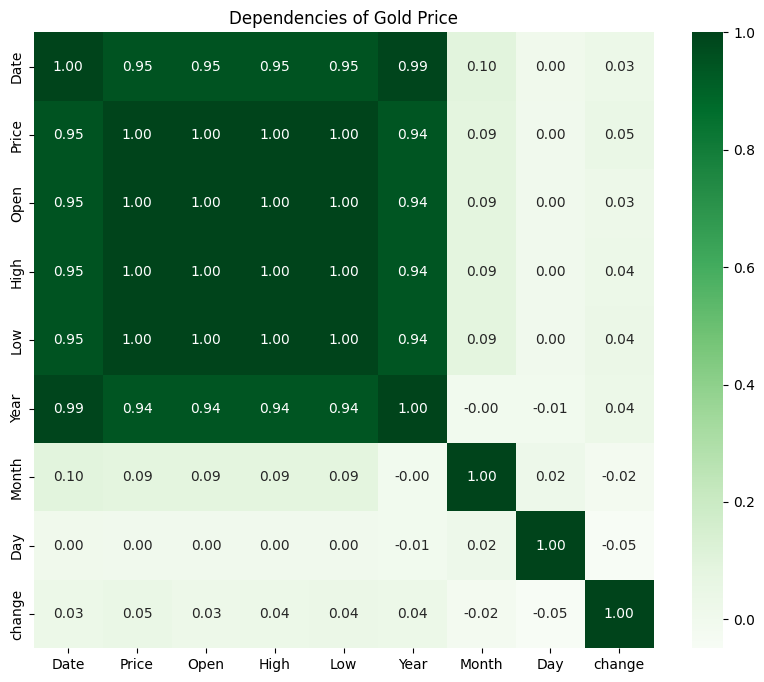

In [ ]:
corr=df.corr()
fig, ax=plt.subplots(figsize=(10,8))
sns.heatmap(corr,cmap='Greens',annot=True,fmt=".2f",ax=ax)
plt.title("Dependencies of Gold Price")
plt.show()

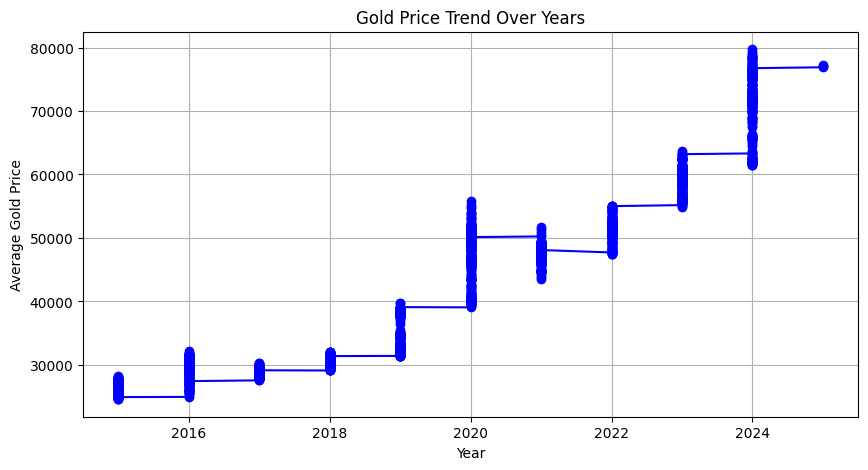

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df["Year"], df["Price"], marker='o', linestyle='-', color='blue')
plt.xlabel("Year")
plt.ylabel("Average Gold Price")
plt.title("Gold Price Trend Over Years")
plt.grid(True)
plt.show()

In [ ]:
df["Price_Zscore"] = np.abs(stats.zscore(df["Price"]))
df["Year_Zscore"] = np.abs(stats.zscore(df["Year"]))
outliers_price = df[df["Price_Zscore"] > 3]
outliers_year = df[df["Year_Zscore"] > 3]

print("Max Z-score for Price:", df["Price_Zscore"].max())
print("Max Z-score for Year:", df["Year_Zscore"].max())
print("Number of outliers in Price:", len(outliers_price))
print("Number of outliers in Year:", len(outliers_year))

Max Z-score for Price: 2.5650704612480304
Max Z-score for Year: 1.9098149688083794
Number of outliers in Price: 0
Number of outliers in Year: 0


In [ ]:
import pandas as pd
usd=pd.read_csv("usd.csv")
usd.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,09-01-2025,85.890,85.922,85.947,85.830,NaN,-0.03%
1,08-01-2025,85.917,85.775,85.943,85.770,NaN,0.13%
2,07-01-2025,85.803,85.705,85.813,85.649,NaN,0.12%
3,06-01-2025,85.700,85.816,85.855,85.601,NaN,-0.07%
4,03-01-2025,85.761,85.836,85.836,85.705,NaN,0.00%


In [ ]:
import re
usd['Change %']=usd['Change %'].astype(str).str.replace('%','')
usd['Change %']=usd['Change %'].astype(float)
usd.head()
usd['change']=((usd['Change %']/100)*usd['Price'])
usd.drop(['Vol.','Change %'],axis=1,inplace=True)

usd["Date"]=pd.to_datetime(usd["Date"],format="%d-%m-%Y")
usd['Year']=usd["Date"].dt.year
usd['Month']=usd["Date"].dt.month
usd['Day']=usd["Date"].dt.day
usd.drop(['Date'],axis=1,inplace=True)
usd.head()

for col in ['Year','Month','Day']:
    usd[col]=(usd[col].astype(int))
usd.head()

,Price,Open,High,Low,change,Year,Month,Day
0,85.890,85.922,85.947,85.830,-0.025767,2025,1,9
1,85.917,85.775,85.943,85.770,0.111692,2025,1,8
2,85.803,85.705,85.813,85.649,0.102964,2025,1,7
3,85.700,85.816,85.855,85.601,-0.059990,2025,1,6
4,85.761,85.836,85.836,85.705,0.000000,2025,1,3


<Axes: >

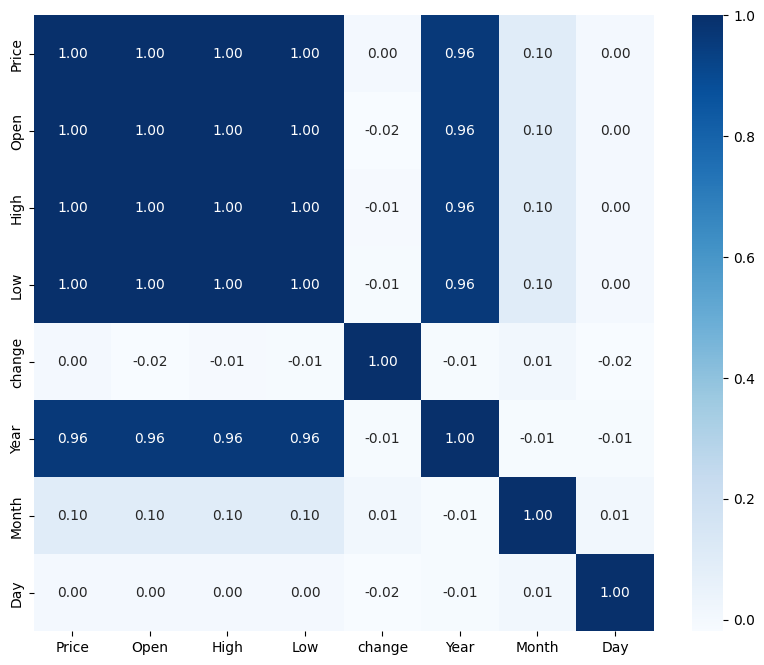

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig=plt.figure(figsize=(10,8))
sns.heatmap(usd.corr(),cmap='Blues',annot=True,fmt=".2f")

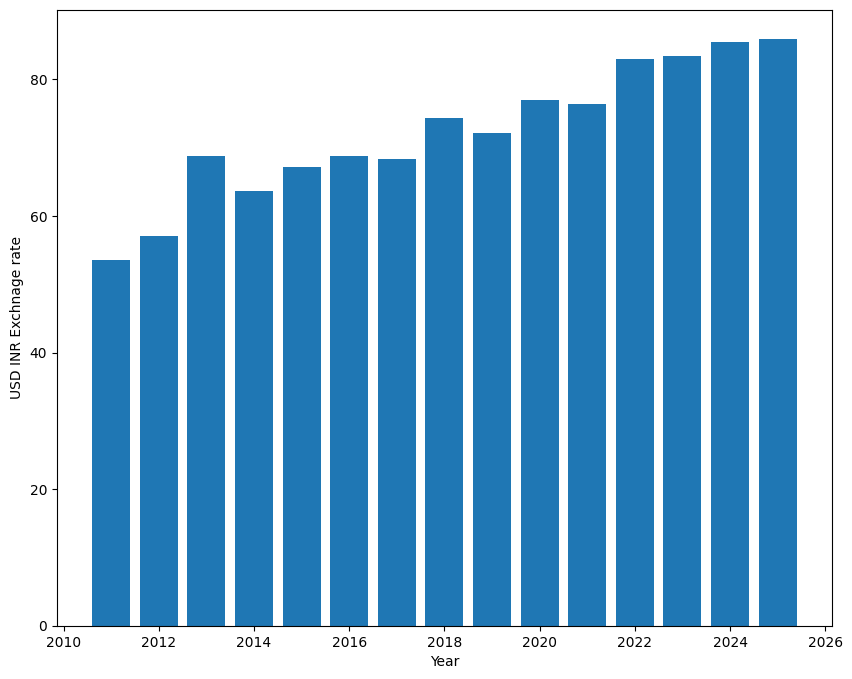

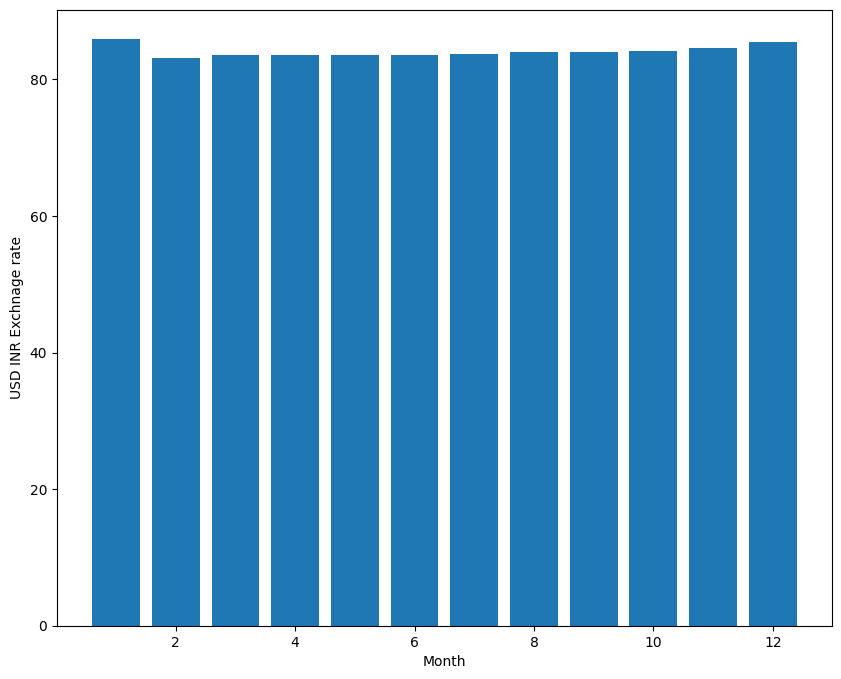

In [ ]:

plt.figure(figsize=(10,8))
plt.bar(usd['Year'],usd['Price'])
plt.xlabel("Year")
plt.ylabel("USD INR Exchnage rate")
plt.show()


plt.figure(figsize=(10,8))
plt.bar(usd['Month'],usd['Price'])
plt.xlabel("Month")
plt.ylabel("USD INR Exchnage rate")
plt.show()

In [ ]:
gold_df=df.loc[:,["Price",'Year','Month','Day']]
usd_df=usd.loc[:,["Price",'Year','Month','Day']]

gold_usd=gold_df.merge(usd_df,on=['Year','Month','Day'],how='inner')
gold_usd['Date']=gold_usd['Year'].astype(str)+'-'+gold_usd['Month'].astype(str)+'-'+gold_usd['Day'].astype(str)
gold_usd['Date']=pd.to_datetime(gold_usd['Date'],format="%Y-%m-%d")
gold_usd.drop(['Year','Month','Day'],axis=1,inplace=True)
gold_usd.head()

,Price_x,Price_y,Date
0,77158.0,85.700,2025-01-06
1,77317.0,85.761,2025-01-03
2,76893.0,85.645,2025-01-01
3,76748.0,85.554,2024-12-31
4,76260.0,85.474,2024-12-30


In [ ]:
import pandas as pd
shares=pd.read_csv("bse.csv")
shares.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,13-03-2025,"74,161.33","74,392.54","74,392.54","74,050.20",3.41M,0.18%
1,12-03-2025,"74,029.76","74,270.81","74,390.74","73,599.16",13.85M,-0.10%
2,11-03-2025,"74,102.32","73,743.88","74,195.17","73,663.60",11.68M,-0.02%
3,10-03-2025,"74,115.17","74,474.98","74,741.25","74,022.24",6.59M,-0.29%
4,07-03-2025,"74,332.58","74,347.14","74,586.43","74,038.03",6.90M,-0.01%


In [ ]:
shares['Price']=shares['Price'].astype(str).str.replace(',','')
shares['Price']=shares['Price'].astype(float)

shares["Date"]=pd.to_datetime(shares["Date"],format="%d-%m-%Y")
shares['Year']=shares["Date"].dt.year
shares['Month']=shares["Date"].dt.month
shares['Day']=shares["Date"].dt.day
shares.drop(['Date','Open','High','Low','Vol.','Change %'],axis=1,inplace=True)
shares.head()

for col in ['Year','Month','Day']:
    shares[col]=(shares[col].astype(int))
shares.head()

,Price,Year,Month,Day
0,74161.33,2025,3,13
1,74029.76,2025,3,12
2,74102.32,2025,3,11
3,74115.17,2025,3,10
4,74332.58,2025,3,7


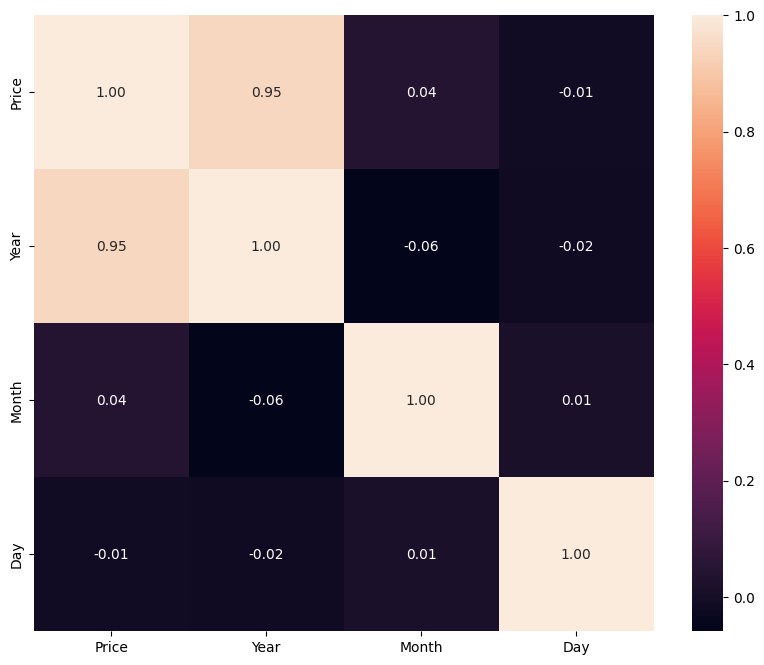

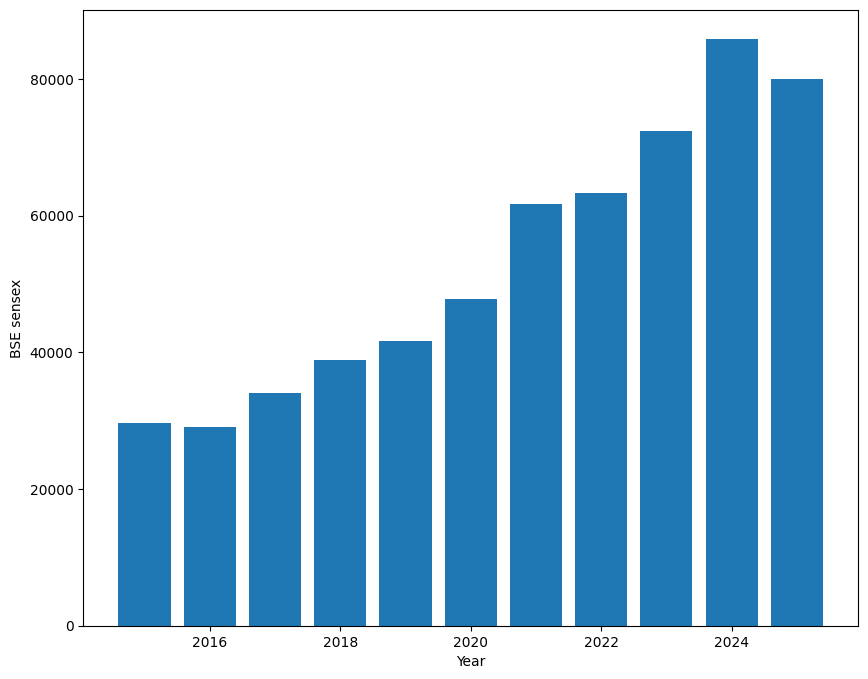

In [ ]:
corr=shares.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,fmt='.2f')

plt.figure(figsize=(10,8))
plt.bar(shares['Year'],shares['Price'])
plt.xlabel("Year")
plt.ylabel("BSE sensex")
plt.show()



In [ ]:
share_df=shares[['Price','Year','Month','Day']].copy()
share_df.head()
share_df['Date']=share_df['Year'].astype(str)+'-'+share_df['Month'].astype(str)+'-'+share_df['Day'].astype(str)
share_df['Date']=pd.to_datetime(share_df['Date'],format="%Y-%m-%d")
share_df.drop(['Year','Month','Day'],axis=1,inplace=True)


merged=gold_usd.merge(share_df,on=['Date'],how='inner')
merged.head()

merged.columns=['Price gold','Price USD','Date',"BSE Price"]
merged.head()

merged['Year']=merged['Date'].dt.year
merged['Month']=merged['Date'].dt.month
merged['Day']=merged['Date'].dt.day
merged.head()

,Price gold,Price USD,Date,BSE Price,Year,Month,Day
0,77158.0,85.700,2025-01-06,77964.99,2025,1,6
1,77317.0,85.761,2025-01-03,79223.11,2025,1,3
2,76893.0,85.645,2025-01-01,78507.41,2025,1,1
3,76748.0,85.554,2024-12-31,78139.01,2024,12,31
4,76260.0,85.474,2024-12-30,78248.13,2024,12,30


In [ ]:
merged["Price_Zscore"] = np.abs(stats.zscore(merged["Price gold"]))
merged["USD_Zscore"] = np.abs(stats.zscore(merged["Price USD"]))
merged["BSE_Zscore"] = np.abs(stats.zscore(merged["BSE Price"]))
outliers_price = merged[merged["Price_Zscore"] > 3]
outliers_usd = merged[merged["USD_Zscore"] > 3]
outliers_bse = merged[merged["BSE_Zscore"] > 3]

print("Max Z-score for Price:", merged["Price_Zscore"].max())
print("Max Z-score for USD Price:", merged["USD_Zscore"].max())
print("Max Z-score for BSE Price:", merged["BSE_Zscore"].max())
print("Number of outliers in Price:", len(outliers_price))
print("Number of outliers in USD:", len(outliers_bse))
print("Number of outliers in BSE:", len(outliers_bse))

Max Z-score for Price: 2.5632832122096763
Max Z-score for USD Price: 1.8890864951175306
Max Z-score for BSE Price: 2.456172637943857
Number of outliers in Price: 0
Number of outliers in USD: 0
Number of outliers in BSE: 0


Regression Coefficients & Contribution to Gold Price:

     Feature   Coefficient  Contribution (%)
0  BSE Price  26559.296782         50.619594
1  Price USD  25909.114070         49.380406

R² Score: 0.9223


<ipython-input-46-bd7329bc78fc>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='Contribution (%)', data=coef_df, palette='coolwarm')


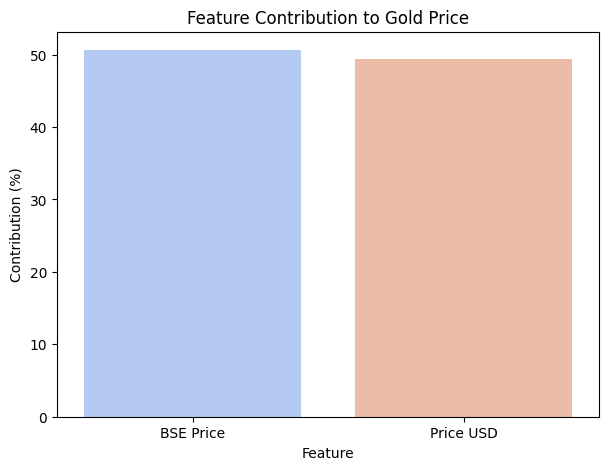

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = merged[['BSE Price', 'Price USD']]
y = merged['Price gold']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
coefficients = model.coef_
contributions = (coefficients / np.sum(np.abs(coefficients))) * 100

coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients, 'Contribution (%)': contributions})
print("Regression Coefficients & Contribution to Gold Price:\n")
print(coef_df)

print(f"\nR² Score: {r2:.4f}")




<Axes: >

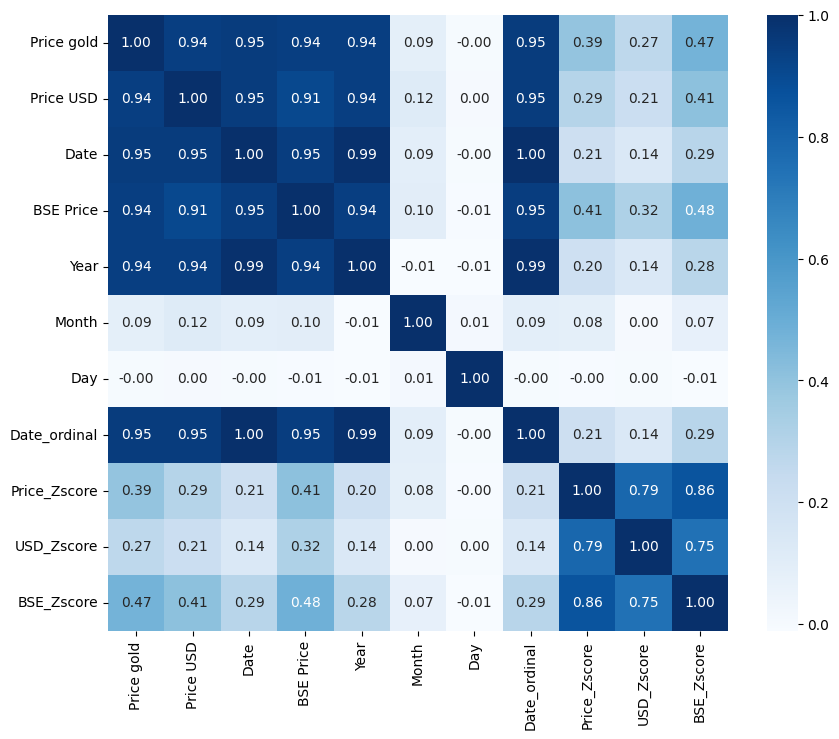

In [ ]:
correlation=merged.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation,cmap='Blues',annot=True,fmt='.2f')
